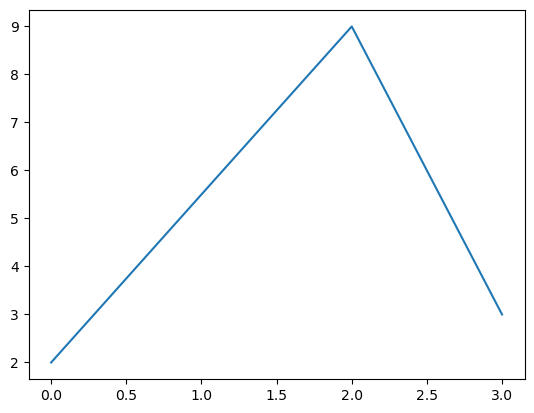

In [320]:
import matplotlib.pyplot as plt
import numpy as np
import data
from iminuit import Minuit
import math as m
from scipy.optimize import minimize

plt.plot([0,2,3],[2,9,3])
plt.show()

In [321]:
file_path = r'tablo.csv'
tables = data.read_csv_with_multiple_tables(file_path)
# Convertir les colonnes en listes de nombres
converted_tables = data.convert_columns_to_lists(tables)

Moyenne de coups du bruit =  8.137254901960784


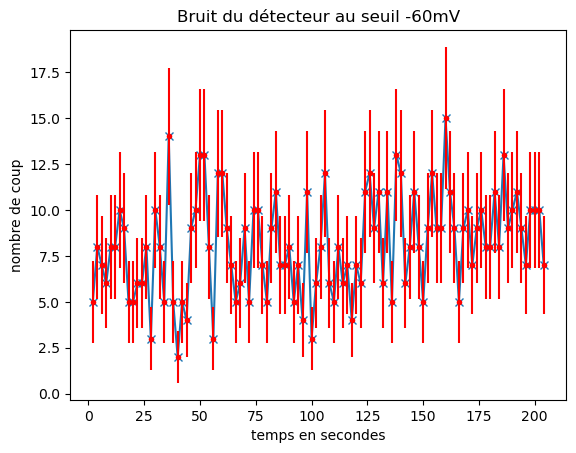

In [322]:
#Graphique 1ère mesure de bruit de fond avec signal seuil = -60mV:
x,y = converted_tables['Tableau seuil = -60mV']
Y = np.array(y)
Yerr = np.sqrt(y)
print("Moyenne de coups du bruit = ",np.mean(y))
#print("\n incertitude sur la mesure Y= \n",Yerr)
plt.plot(x,y,'-x')
plt.matplotlib.pyplot.errorbar(x, y, yerr = Yerr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("Bruit du détecteur au seuil -60mV")
plt.show()


Moyenne de coups du bruit =  14.697368421052632


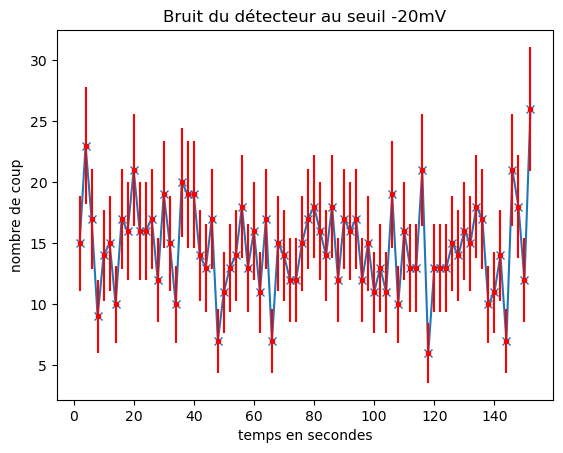

In [323]:
#Graphique bruit de fond avec signal seuil = -20mV:
x,y = converted_tables['Tableau seuil = -20mV']
Y = np.array(y)
Yerr = np.sqrt(y)

print("Moyenne de coups du bruit = ",np.mean(y))
#print("\n incertitude sur la mesure Y= \n",Yerr)

plt.plot(x,y,'-x')
plt.matplotlib.pyplot.errorbar(x, y, yerr = Yerr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("Bruit du détecteur au seuil -20mV")
plt.show()

Moyenne de coups du bruit =  8.048780487804878


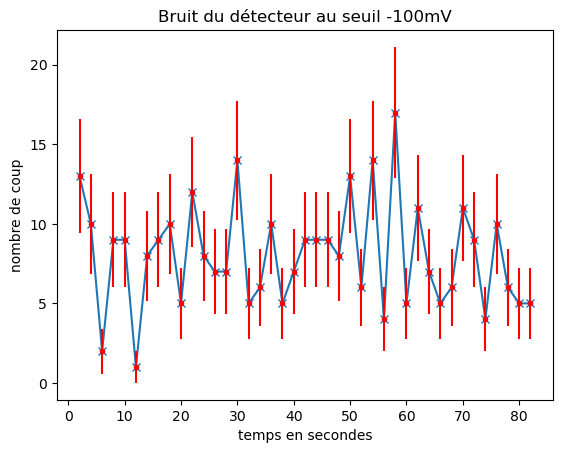

In [324]:
#Graphique bruit de fond avec signal seuil = -100mV:
x,y = converted_tables['Tableau seuil = -100mV']
Y = np.array(y)
Yerr = np.sqrt(y)

print("Moyenne de coups du bruit = ",np.mean(y))
#print("\n incertitude sur la mesure Y= \n",Yerr)

plt.plot(x,y,'-x')
plt.matplotlib.pyplot.errorbar(x, y, yerr = Yerr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("Bruit du détecteur au seuil -100mV")
plt.show()

Moyenne de coups du bruit =  3.2653061224489797


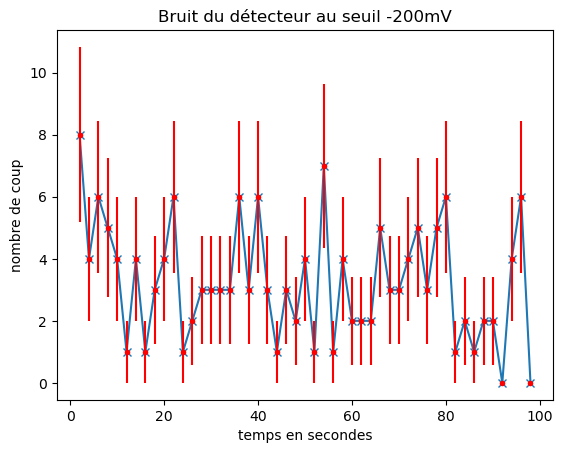

In [325]:
#Graphique bruit de fond avec signal seuil = -200mV:
x,y = converted_tables['Tableau seuil = -200mV']
Y = np.array(y)
Yerr = np.sqrt(y)

print("Moyenne de coups du bruit = ",np.mean(y))
#print("\n incertitude sur la mesure Y= \n",Yerr)

plt.plot(x,y,'-x')
plt.matplotlib.pyplot.errorbar(x, y, yerr = Yerr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("Bruit du détecteur au seuil -200mV")
plt.show()

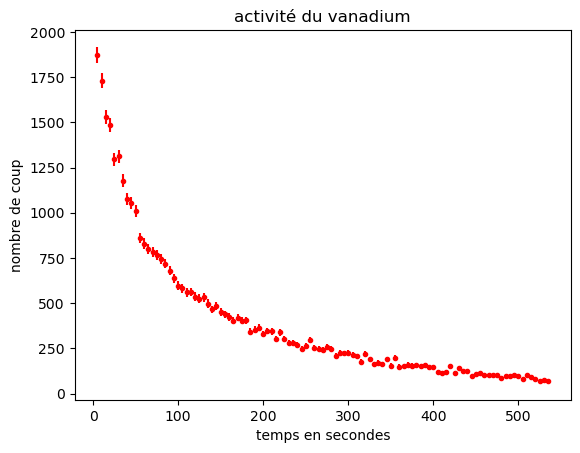

In [326]:
#Graphique vanadium:
xv,yv = converted_tables['Tableau vanadium']
Yv = np.array(yv)
Yverr = np.sqrt(yv)
#print("\n incertitude sur la mesure Y= \n",Yerr)

plt.matplotlib.pyplot.errorbar(xv, yv, yerr = Yverr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("activité du vanadium")
plt.show()

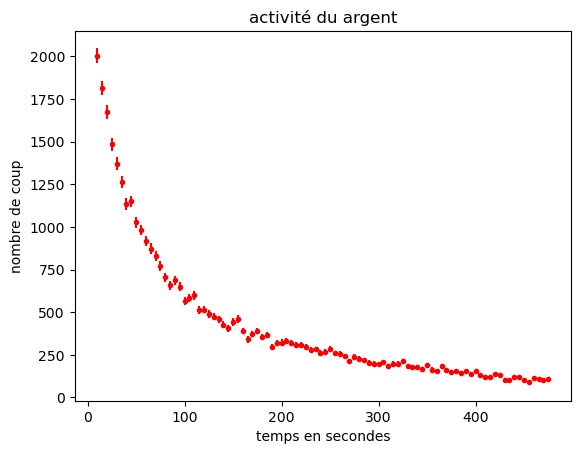

In [327]:
#Graphique argent:
xa,ya = converted_tables['Tableau argent']
Ya = np.array(ya)
Yaerr = np.sqrt(ya)
#print("\n incertitude sur la mesure Y= \n",Yerr)

plt.matplotlib.pyplot.errorbar(xa, ya, yerr = Yaerr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("activité du argent")
plt.show()

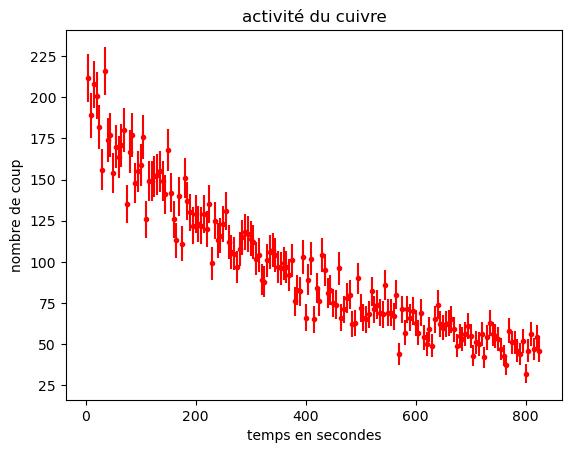

In [328]:
#Graphique cuivre:
xc,yc = converted_tables['Tableau cuivre']
Yc = np.array(yc)
Ycerr = np.sqrt(yc)
#print("\n incertitude sur la mesure Y= \n",Yerr)

plt.matplotlib.pyplot.errorbar(xc, yc, yerr = Ycerr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("activité du cuivre")
plt.show()

In [329]:

import matplotlib.pyplot as plt
import random as rdn
import numpy as np
import math as m
import scipy
import math
from scipy.optimize import minimize
from iminuit import Minuit
import data


def f(x,a,b,c):
    return a*np.exp(-b*x)+c

def Chi2(a,b,c):
    chi2 = 0
    for i in range(0,len(xv)):
        chi2 += math.pow(yv[i]-f(xv[i],a,b,c),2)/math.pow(Yverr[i],2)

    return chi2

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 526.8                      │              Nfcn = 111              │
│ EDM = 6.03e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

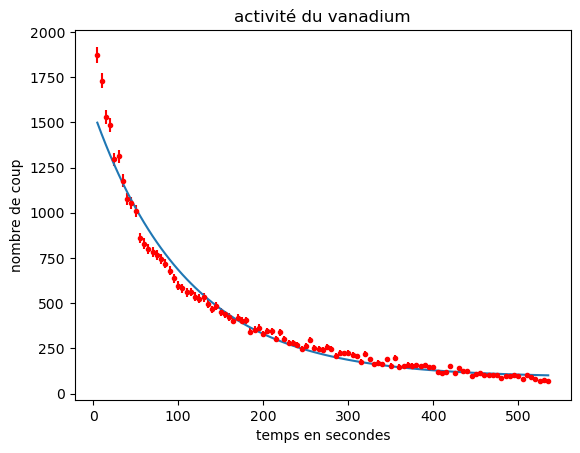

In [330]:
#fit pour le vanadium
import math

minimizer = Minuit(Chi2, a=2000, b=0.3, c=100)
minimizer.limits["a"] = (1000,3000)
minimizer.limits["b"] = (0,1)
minimizer.limits["c"] = (0,1000)
minimizer.migrad()
a_fit = minimizer.values['a']
b_fit = minimizer.values['b']
c_fit = minimizer.values['c']
print(minimizer) 


y_fit = []

for element in xv:
    y_fit.append(f(element,a_fit,b_fit,c_fit))
#print("\n incertitude sur la mesure Y= \n",Yerr)

plt.matplotlib.pyplot.errorbar(xv, yv, yerr = Yverr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("activité du vanadium")

plt.plot(xv,y_fit)
plt.plot

Moyenne de coups du bruit =  3.2653061224489797


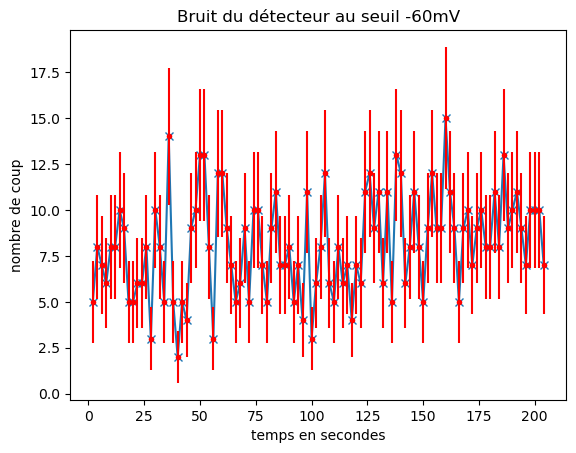

In [331]:
xb,yb = converted_tables['Tableau seuil = -60mV']
Yb = np.array(yb)
Yberr = np.sqrt(yb)
print("Moyenne de coups du bruit = ",np.mean(y))
#print("\n incertitude sur la mesure Y= \n",Yerr)
plt.plot(xb,yb,'-x')
plt.matplotlib.pyplot.errorbar(xb, yb, yerr = Yberr, xerr=None, fmt='r.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("Bruit du détecteur au seuil -60mV")
plt.show()

Données de bruit chargées :


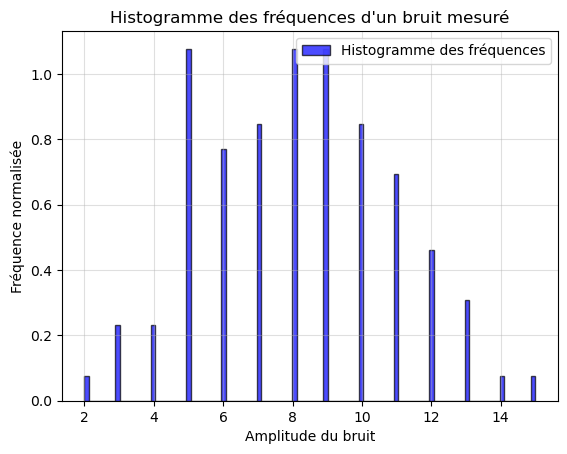

In [332]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les données de bruit à partir d'un fichier
# Remplacez 'mesure_bruit.txt' par le chemin de votre fichier


# Vérifiez les données
print("Données de bruit chargées :")


# Créer un histogramme des fréquences
plt.hist(yb, bins=len(xb), density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogramme des fréquences')

# Ajouter un titre et des étiquettes
plt.title("Histogramme des fréquences d'un bruit mesuré")
plt.xlabel("Amplitude du bruit")
plt.ylabel("Fréquence normalisée")
plt.legend()
plt.grid(alpha=0.4)

# Afficher l'histogramme
plt.show()

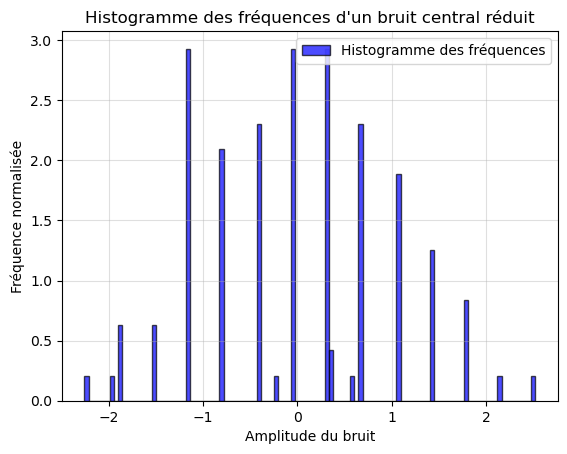

In [333]:
#bruit centré réduit

moy = np.mean(yb)
sigma = np.std(yb)

yb = np.array(yb)
Yb = np.array([])

yb_gen=np.random.normal(moy,sigma,abs(len(xv)-len(yb)))
yb = np.concatenate((yb,yb_gen))

for i in range(len(yb)):
    Yb = np.append(Yb,(yb[i]-moy)/sigma)

plt.hist(Yb, bins=len(Yb), density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogramme des fréquences')

# Ajouter un titre et des étiquettes
plt.title("Histogramme des fréquences d'un bruit central réduit")
plt.xlabel("Amplitude du bruit")
plt.ylabel("Fréquence normalisée")
plt.legend()
plt.grid(alpha=0.4)

# Afficher l'histogramme
plt.show()


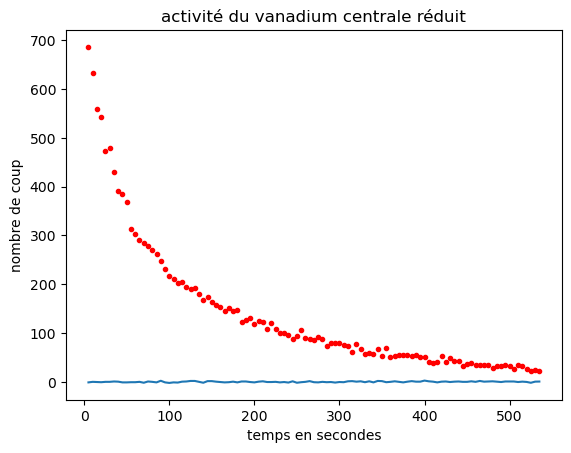

In [334]:
#Graphique vanadium:
Yv =[]
for i in range(len(xv)):
    Yv = np.append(Yv,(yv[i]-moy)/sigma)
    
plt.plot(xv, Yv,'r.')
plt.plot(xv,Yb)
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("activité du vanadium centrale réduit")
plt.show()

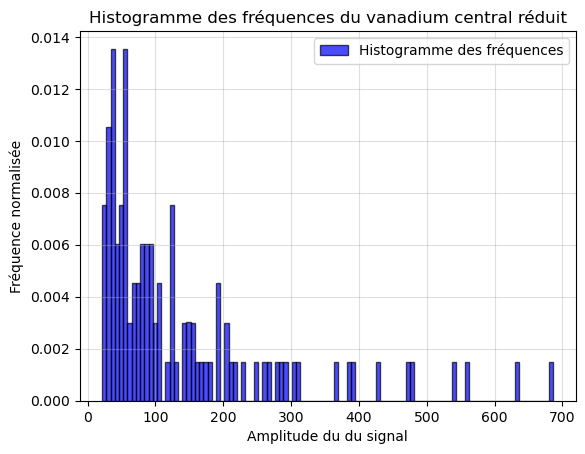

In [335]:
plt.hist(Yv, bins=len(xv), density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogramme des fréquences')

# Ajouter un titre et des étiquettes
plt.title("Histogramme des fréquences du vanadium central réduit")
plt.xlabel("Amplitude du du signal")
plt.ylabel("Fréquence normalisée")
plt.legend()
plt.grid(alpha=0.4)

# Afficher l'histogramme
plt.show()

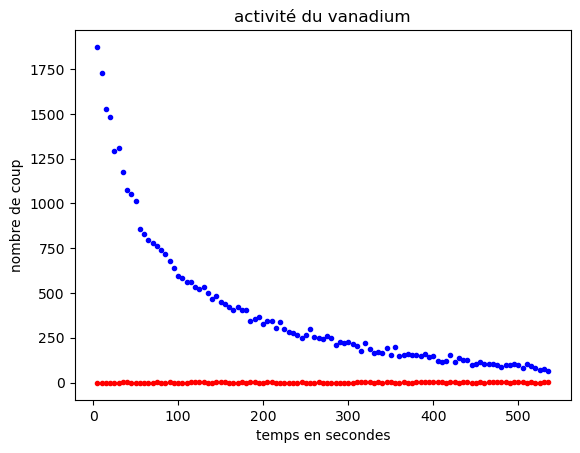

In [336]:
plt.plot(xv, Yb,'r.')
plt.plot(xv, yv,'b.')
plt.xlabel("temps en secondes")
plt.ylabel("nombre de coup")
plt.title("activité du vanadium")
plt.show()